In [22]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [35]:
#diabetes_data = pd.read_csv('Diabetes_prediction.csv')
diabetes_data = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes_data = diabetes_data.sample(n=1000)

In [46]:
diabetes_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
96354,Female,21.0,0,0,never,27.35,6.5,160,0
62086,Female,62.0,1,0,current,27.32,5.7,126,1
95929,Female,74.0,0,0,former,38.91,6.5,158,0
6749,Female,31.0,0,0,never,29.05,5.7,100,0
51230,Male,54.0,1,0,never,31.54,6.1,159,0
...,...,...,...,...,...,...,...,...,...
43356,Female,46.0,0,0,No Info,27.32,6.2,80,0
89289,Male,64.0,0,0,never,36.90,4.8,160,0
33481,Male,68.0,0,0,No Info,31.10,4.5,155,0
23016,Male,22.0,0,0,current,27.32,6.1,126,0


- gender

- Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other.

- age


- Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

- hypertension

- Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.

- heart_disease

- Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.

- smoking_history

- Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.

- bmi

- BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.

- HbA1c_level

- HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

- blood_glucose_level

- Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

- diabetes

- Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the

Uni-variate

In [36]:
diabetes_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.298480,0.090000,0.040000,27.665660,5.540700,137.425000,0.073000
std,22.546542,0.286325,0.196057,7.119843,1.051894,39.387101,0.260267
min,0.240000,0.000000,0.000000,12.900000,3.500000,80.000000,0.000000
25%,23.000000,0.000000,0.000000,23.600000,4.800000,100.000000,0.000000
50%,42.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,58.000000,0.000000,0.000000,30.475000,6.200000,158.000000,0.000000
max,80.000000,1.000000,1.000000,59.990000,9.000000,300.000000,1.000000


In [37]:
numeric_data = diabetes_data[['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes']]
numeric_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.298480,0.090000,0.040000,27.665660,5.540700,137.425000,0.073000
std,22.546542,0.286325,0.196057,7.119843,1.051894,39.387101,0.260267
min,0.240000,0.000000,0.000000,12.900000,3.500000,80.000000,0.000000
25%,23.000000,0.000000,0.000000,23.600000,4.800000,100.000000,0.000000
50%,42.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,58.000000,0.000000,0.000000,30.475000,6.200000,158.000000,0.000000
max,80.000000,1.000000,1.000000,59.990000,9.000000,300.000000,1.000000


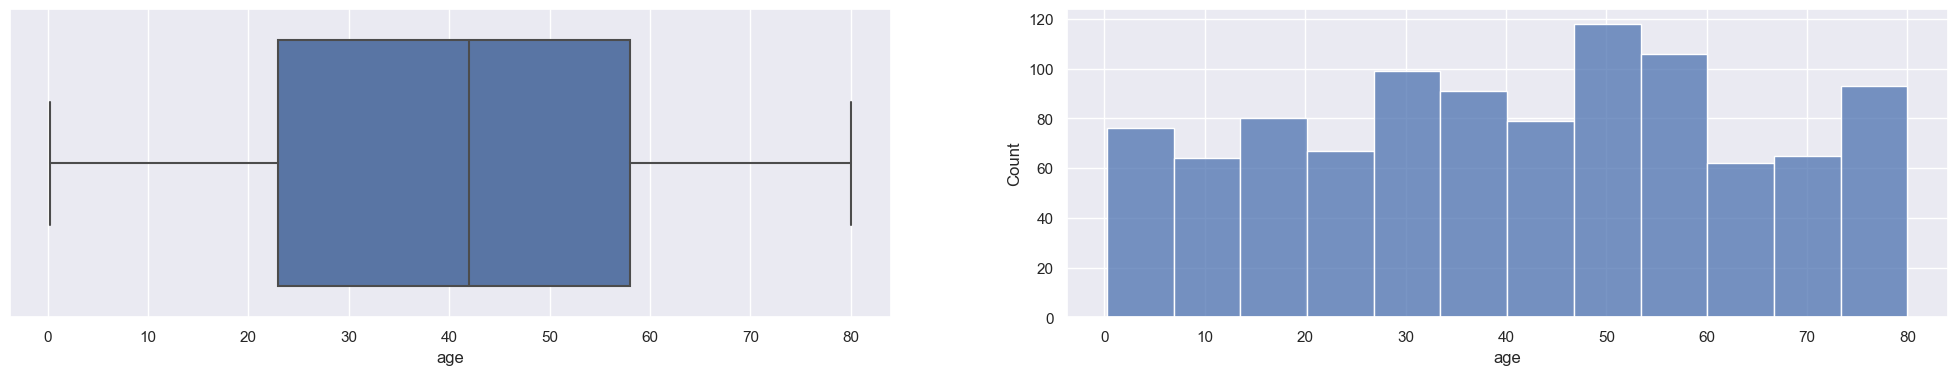

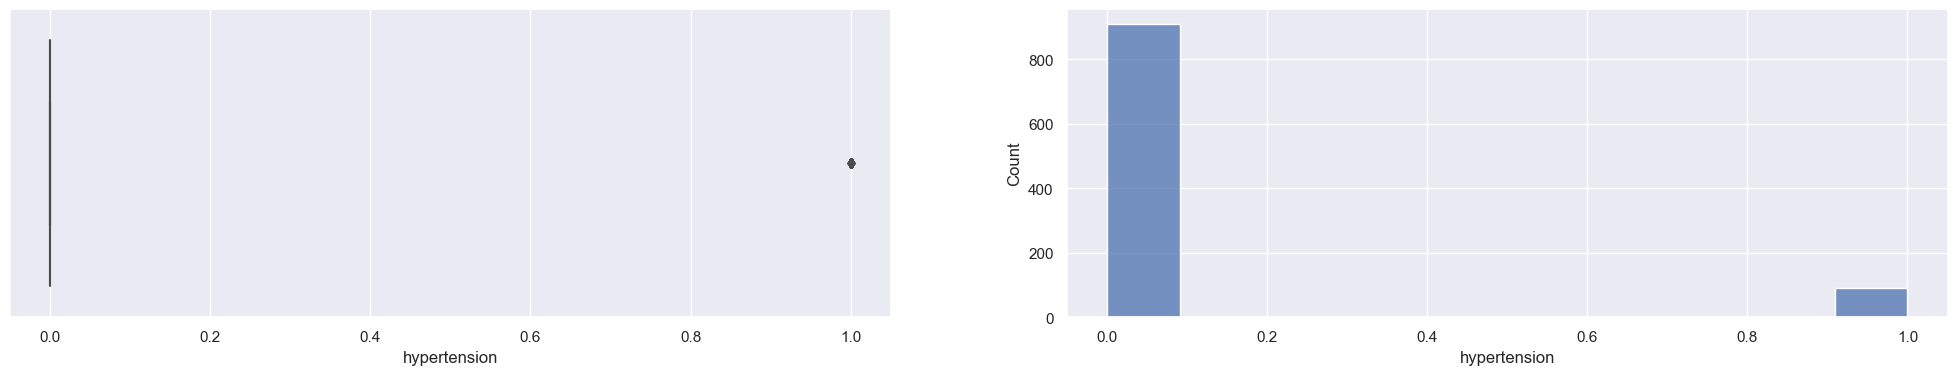

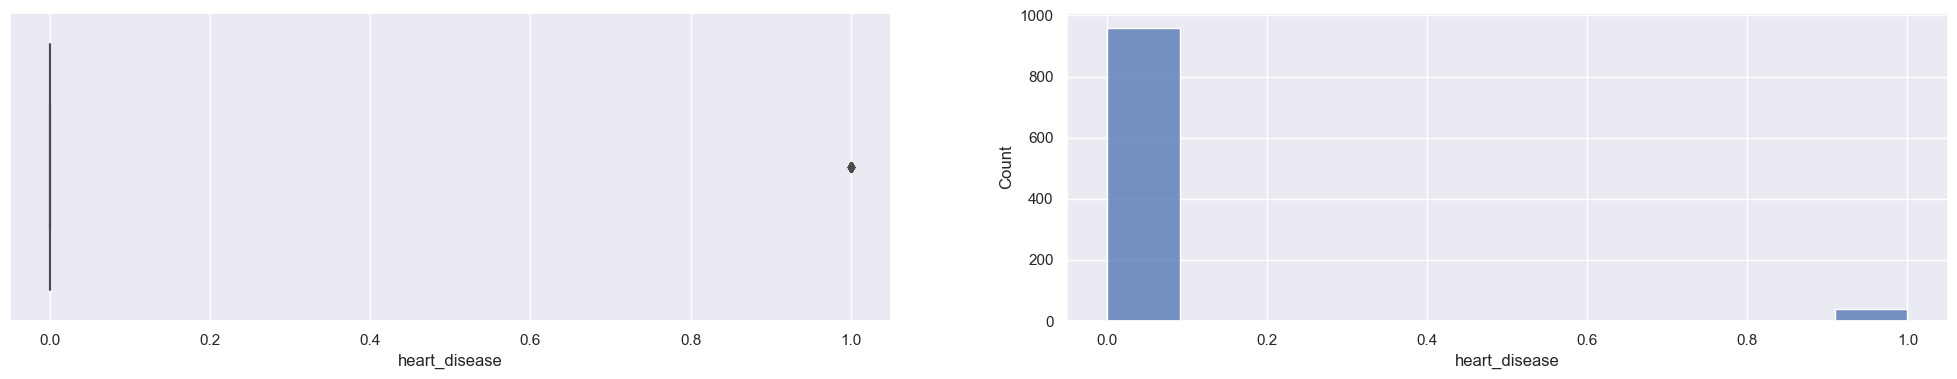

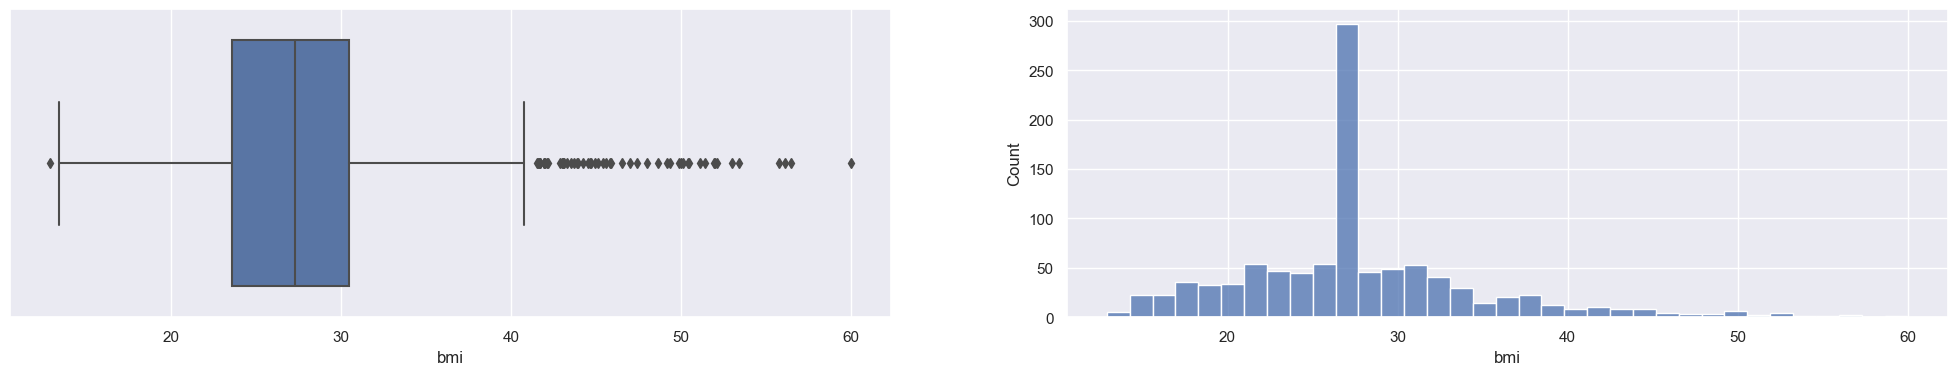

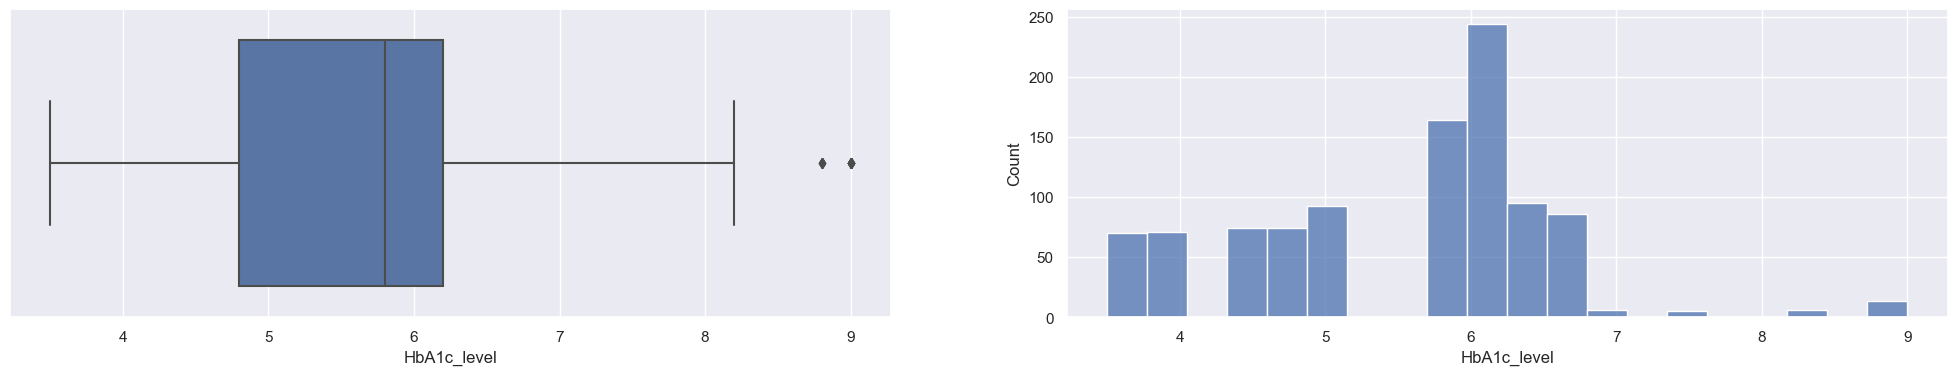

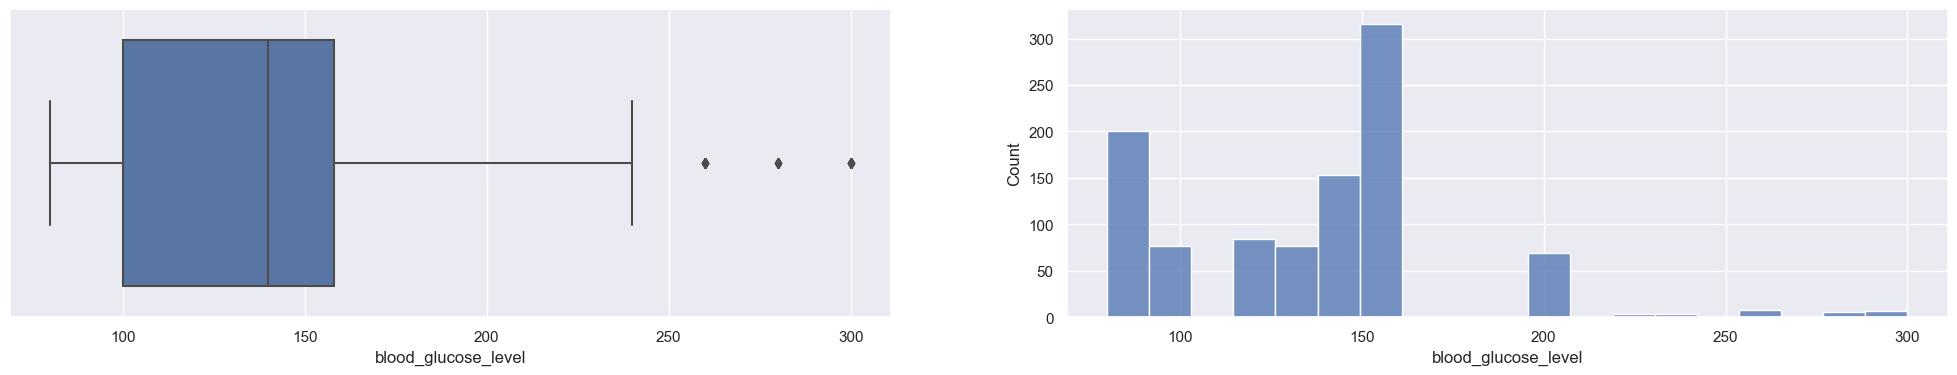

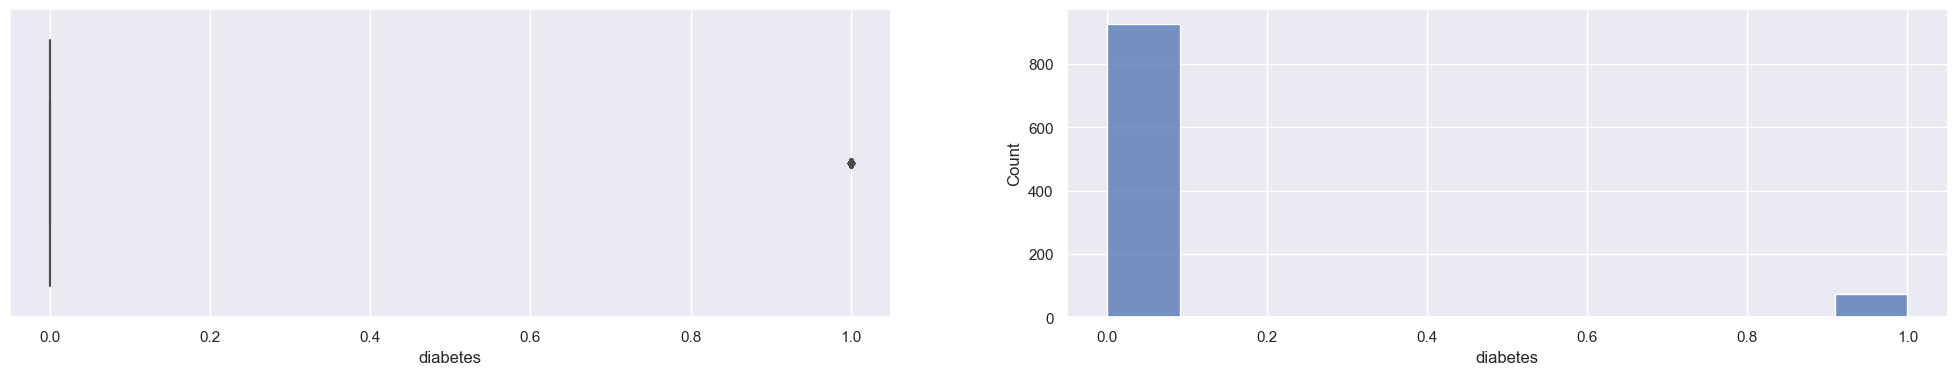

In [38]:
def Univariate_boxplot (data,column):
    f, axes = plt.subplots(1, 2, figsize=(25, 4))
    sb.boxplot(x = column,data = data, orient = "h", ax = axes[0])
    sb.histplot(data = data,x = column, ax = axes[1])
for columns in numeric_data :
    Univariate_boxplot (numeric_data,columns)

In [39]:
#Bi-variate

In [40]:
#sb.jointplot(data = jointDF, x = "Attack", y = "HP", height = 12)

In [41]:
#Multi-variate

C:\Users\qiany\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


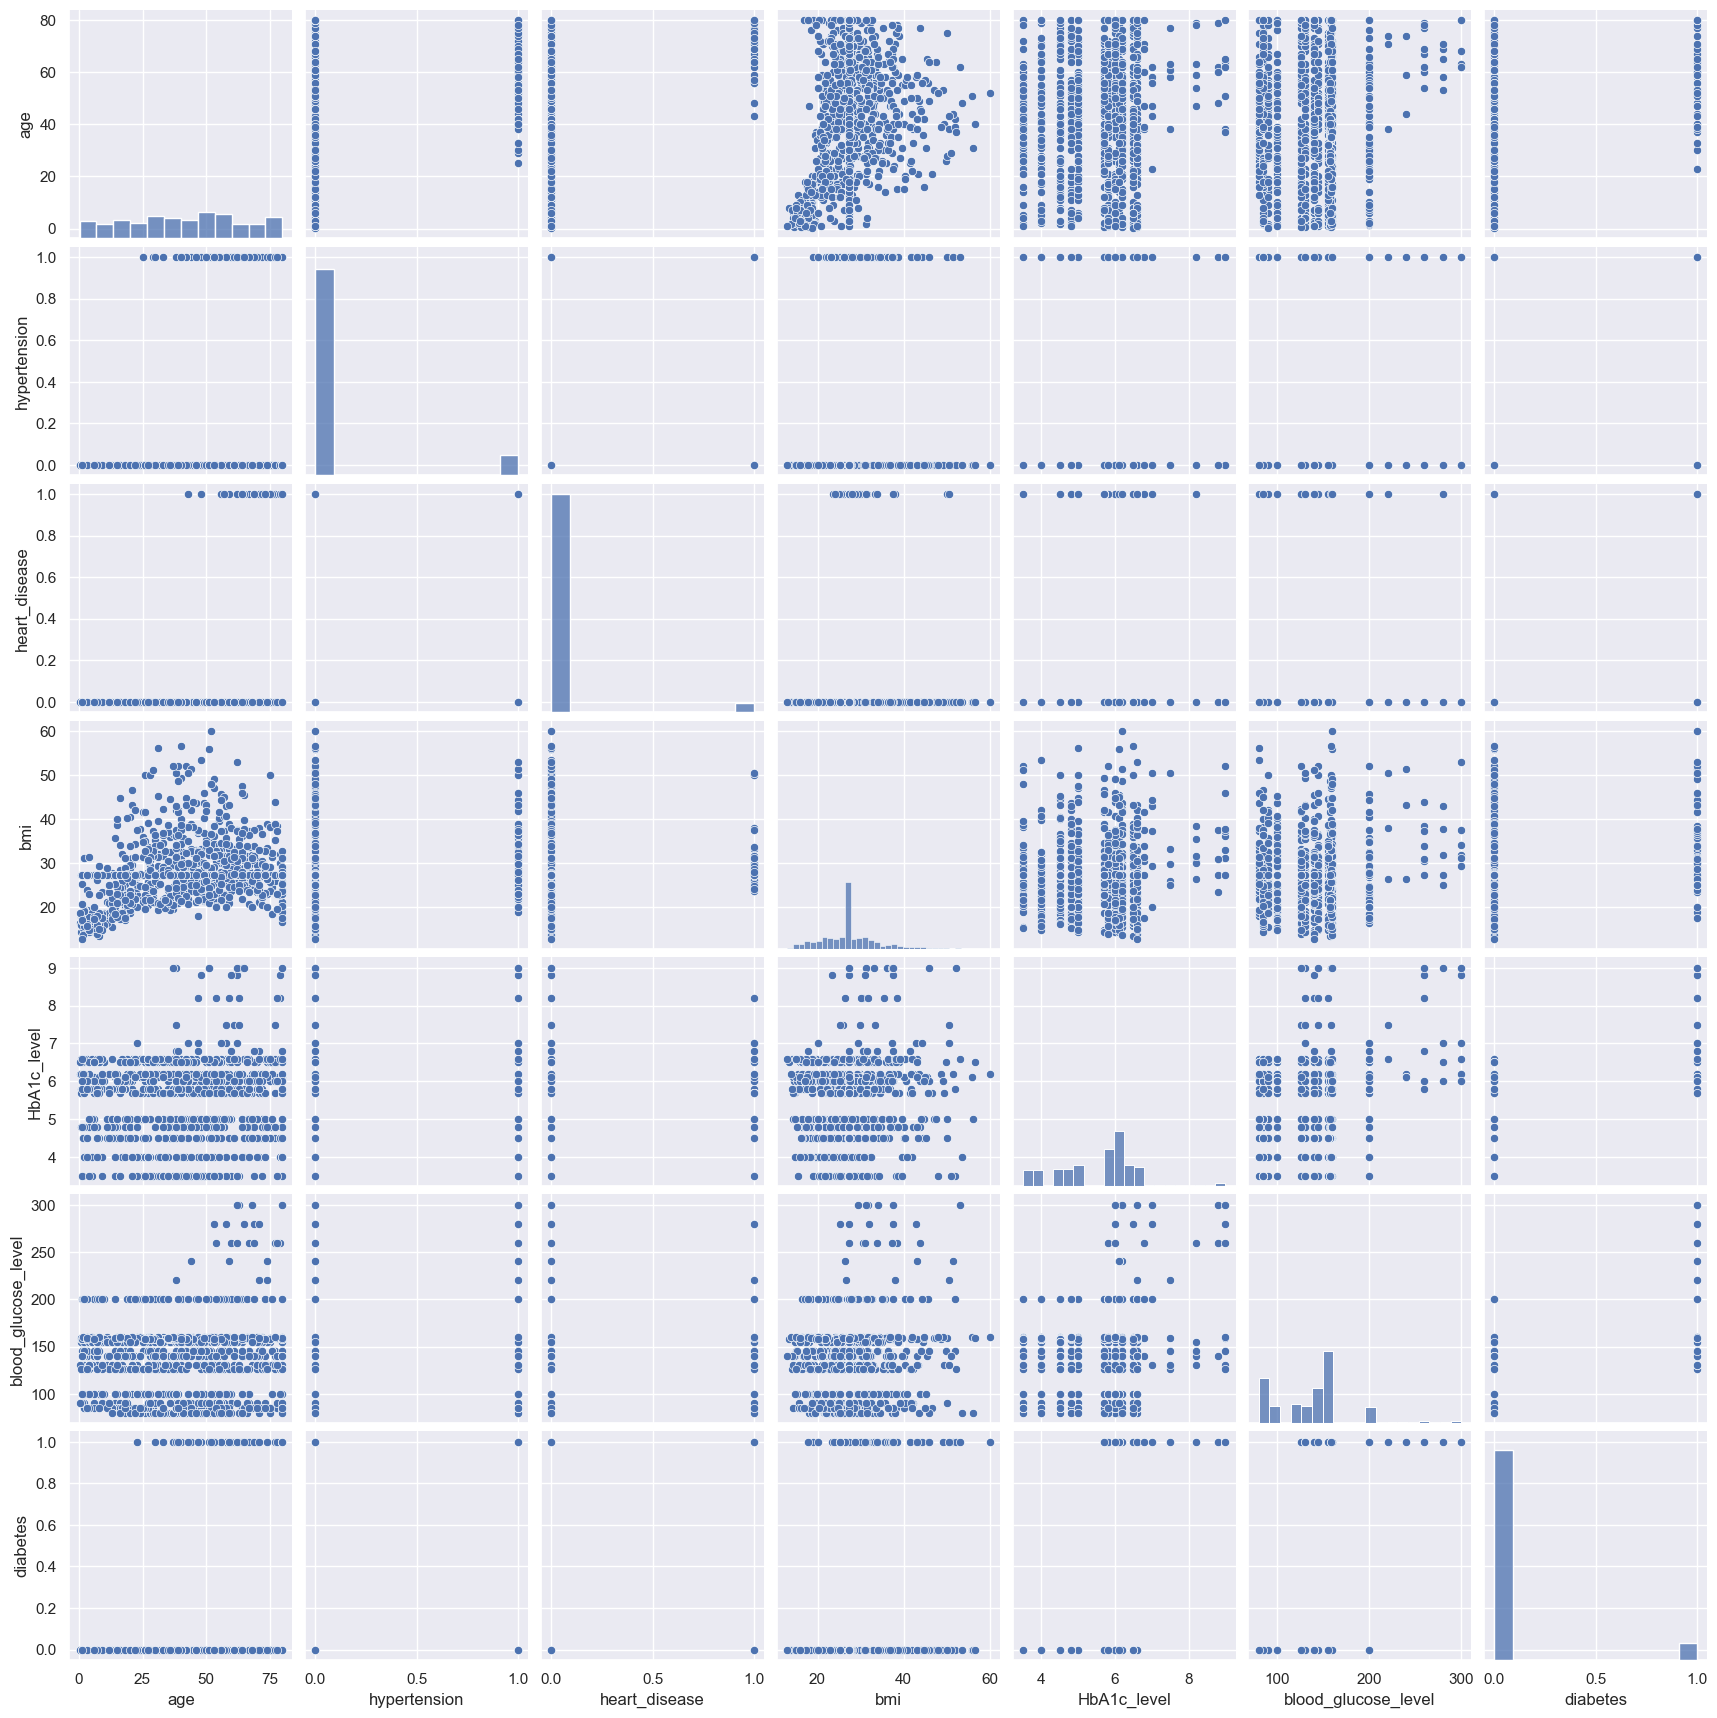

In [42]:
sb.pairplot(data = numeric_data)

In [43]:
#Correlation

<Axes: >

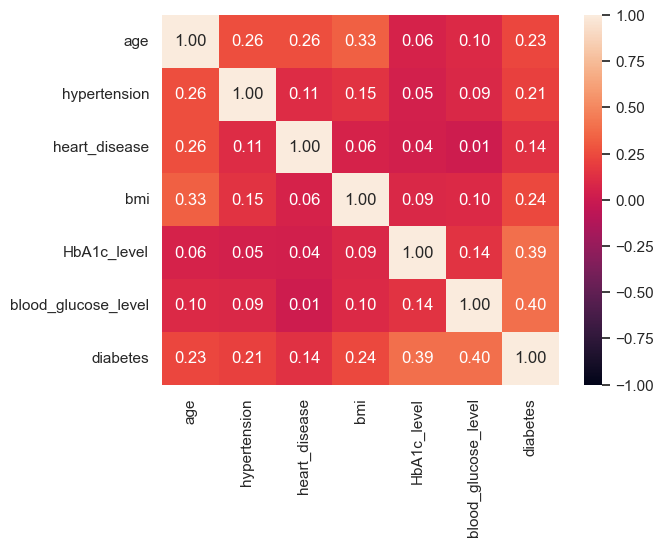

In [44]:
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [45]:
numeric_data.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.260985,0.262242,0.329056,0.058749,0.096986,0.231858
hypertension,0.260985,1.000000,0.114123,0.146346,0.045656,0.089449,0.207263
heart_disease,0.262242,0.114123,1.000000,0.055090,0.035297,0.011407,0.138889
bmi,0.329056,0.146346,0.055090,1.000000,0.090934,0.095254,0.241992
HbA1c_level,0.058749,0.045656,0.035297,0.090934,1.000000,0.143568,0.394257
blood_glucose_level,0.096986,0.089449,0.011407,0.095254,0.143568,1.000000,0.396252
diabetes,0.231858,0.207263,0.138889,0.241992,0.394257,0.396252,1.000000
